In [2]:
import pandas as pd
df = pd.read_csv("TehranHouse.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Room,3479.0,2.079908e+00,7.582753e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3479.0,5.359023e+09,8.099935e+09,3600000.0,1.418250e+09,2.900000e+09,6.000000e+09,9.240000e+10
Price(USD),3479.0,1.786341e+05,2.699978e+05,120.0,4.727500e+04,9.666667e+04,2.000000e+05,3.080000e+06


In [5]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [6]:
df["Address"].value_counts().head(20)

Address
Punak                        161
Pardis                       146
West Ferdows Boulevard       145
Gheitarieh                   141
Shahran                      130
Saadat Abad                  129
Parand                       127
Shahr-e-Ziba                 109
Southern Janatabad            93
Central Janatabad             91
Jeyhoon                       91
Persian Gulf Martyrs Lake     88
Ostad Moein                   83
Andisheh                      83
East Ferdows Boulevard        74
Shahrake Qods                 69
Niavaran                      68
Pasdaran                      67
Pirouzi                       63
Salsabil                      60
Name: count, dtype: int64

In [7]:
bool_cols = ["Parking", "Warehouse", "Elevator"]
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [8]:
df["Address"] = df["Address"].astype("category").cat.codes
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33


<Axes: >

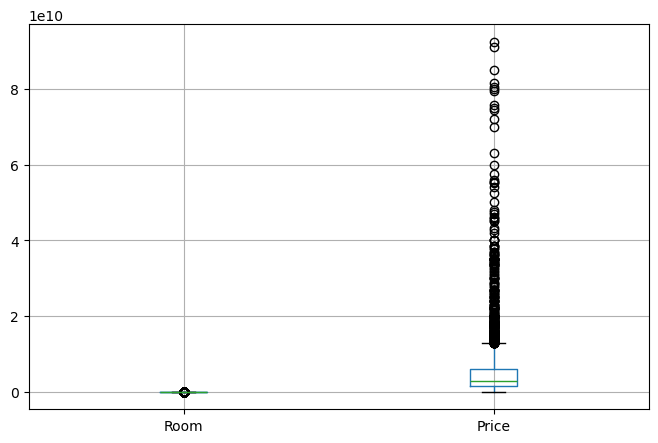

In [9]:
df[["Area", "Room", "Price"]].boxplot(figsize=(8,5))

In [11]:
df.corr(numeric_only=True)["Price"].sort_values(ascending=False)

Price(USD)    1.000000
Price         1.000000
Room          0.567732
Parking       0.190086
Elevator      0.111446
Warehouse     0.109367
Address      -0.069112
Name: Price, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

x = df.drop("Price", axis=1)
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
df["Price"]= df["Price"].astype(str).str.replace(",", "").astype(float)

In [16]:
df["Address"] = df["Address"].astype("category").cat.codes

In [22]:
x = df.drop("Price", axis=1)
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
df.dtypes

Area           object
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address         int16
Price         float64
Price(USD)    float64
dtype: object

In [19]:
df["Area"].unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [20]:
df[ df["Area"].str.contains(r"[^0-9\.]",na=False) ]["Area"].unique()

array([' 3,310,000,000 ', ' 16,160,000,000 ', ' 1,000 ',
       ' 8,400,000,000 ', ' 3,600 ', ' 2,550,000,000 '], dtype=object)

In [21]:
bad_values = [ ' 3,310,000,000 ', ' 16,160,000,000 ', ' 1,000 ', ' 8,400,000,000 ', ' 3,600 ', ' 2,550,000,000 ' ]
df=df[~df["Area"].isin(bad_values)]
df["Area"]=df["Area"].astype(str).str.replace(",","").astype(float)
df.dtypes

Area          float64
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address         int16
Price         float64
Price(USD)    float64
dtype: object

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error

preds = model.predict(x_test)

print("R2 score:", r2_score(y_test, preds))
print("MAE:", mean_absolute_error(y_test,preds))

R2 score: 0.9999999999999999
MAE: 64.47888779983246


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
try:
    y_pred = preds
except NameError:
    y_pred = model.predict(x_test)

r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("MAE:", mae)

R2 score: 0.9999999999999999
MAE: 64.47888779983246


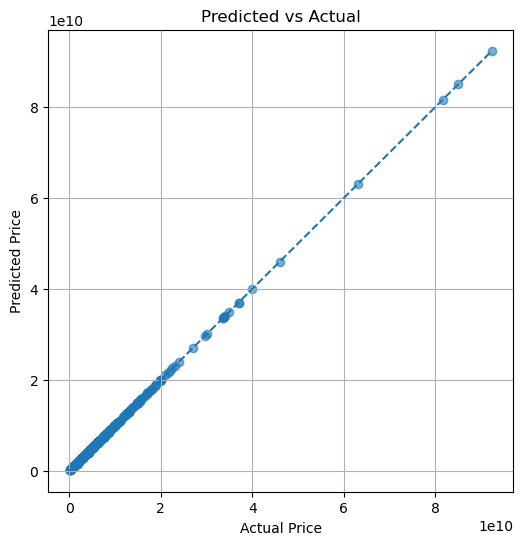

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
max_val = max(max(y_test.max(),y_pred.max()), 1)
min_val = min(min(y_test.min(), y_pred.min()), 0)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()
          

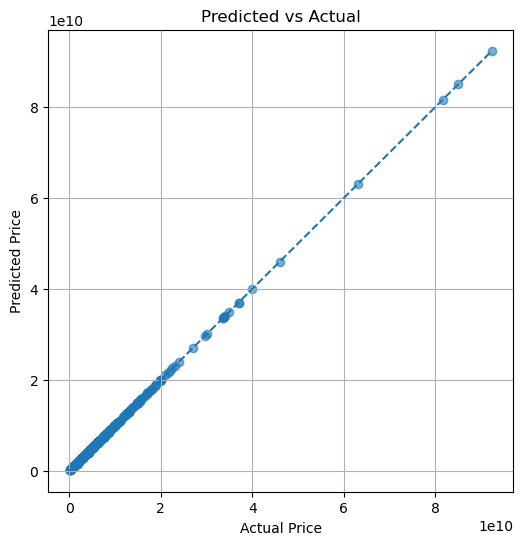

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
max_val = max(max(y_test.max(),y_pred.max()), 1)
min_val = min(min(y_test.min(), y_pred.min()), 0)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()
          

<Figure size 800x500 with 0 Axes>

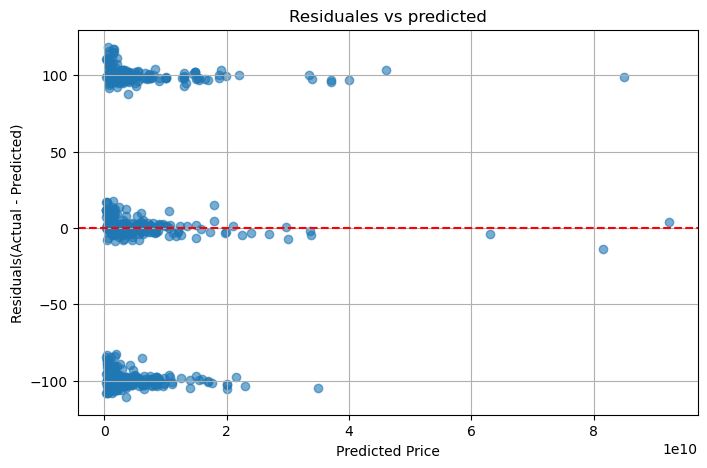

In [32]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals(Actual - Predicted)")
plt.title("Residuales vs predicted")
plt.grid(True)
plt.show()

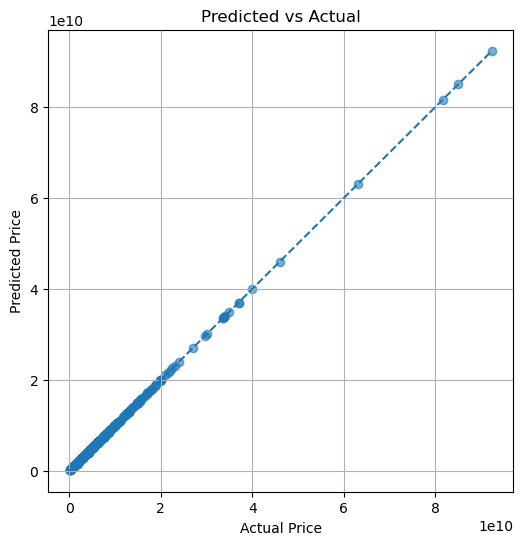

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
max_val = max(max(y_test.max(),y_pred.max()), 1)
min_val = min(min(y_test.min(), y_pred.min()), 0)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()
          

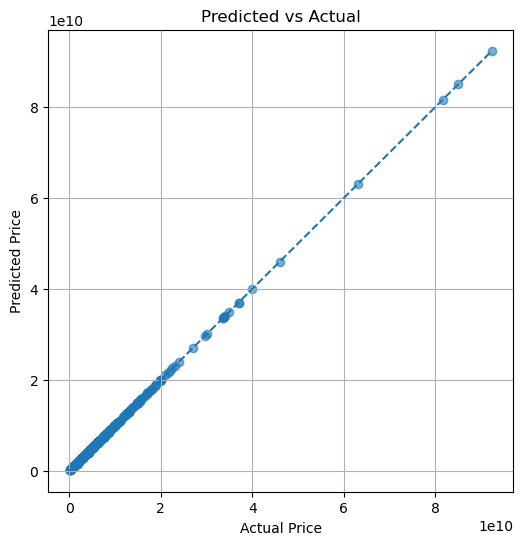

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
max_val = max(max(y_test.max(),y_pred.max()), 1)
min_val = min(min(y_test.min(), y_pred.min()), 0)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()
          

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.savefig("actual_vs_predicted.png", bbox_inches='tight')
plt.close()

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.savefig("residuals.png", bbox_inches='tight')
plt.close()

print("Save actual_vs_predicted.png and residuals.png")

Save actual_vs_predicted.png and residuals.png


In [34]:
import joblib

joblib.dump(model, "house_price_model.pkl")
print("Model saved successfully as house_price_model.pkl")

Model saved successfully as house_price_model.pkl


In [36]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

import pandas as pd 
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

print("Scaler fitted and data scaled. shapes:", x_train_scaled.shape, x_test_scaled.shape)

Scaler fitted and data scaled. shapes: (2778, 7) (695, 7)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

model=LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

r2=r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Retrained LinearRegression on scaled data:")
print("R2:", r2)
print("MAE:", mae)

Retrained LinearRegression on scaled data:
R2: 0.9999999999999999
MAE: 64.47888780017551


In [38]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "house_price_model_scaled.pkl")

print("Saved scaler as scaler.pkl and model as house_price_model_scaled.pkl")

Saved scaler as scaler.pkl and model as house_price_model_scaled.pkl


In [39]:
loaded_scaler = joblib.load("scaler.pkl")
loaded_model= joblib.load("house_price_model_scaled.pkl")

sample = x_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample)
pred_sample= loaded_model.predict(sample_scaled)

print("Predicted:", pred_sample[0])
print("Actual :", y_test.iloc[0])

Predicted: 1739999998.658381
Actual : 1740000000.0


C:\Users\10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
output_df = x_test.copy()
output_df["Actual Price"] = y_test
output_df["Predicted Price"] = y_pred

output_df.to_csv("predictions_output_scaled.csv", index=False)
print("Saved predictions_output_scaled.csv")

Saved predictions_output_scaled.csv


In [43]:
output = x_test.copy()
output['Actual_Price']=y_test.values
output['Predicted_Price']=y_pred

output.to_excel("house_price_predictions.xlsx", index=False)
print("Excel file saved successfully!")

Excel file saved successfully!
